# Работа с сетями 

In [230]:
color_base = ['#405DE6','#5851DB','#833AB4','#C13584','#E1306C','#FD1D1D','#F56040','#F77737','#FCAF45','#FFDC80']

In [231]:
import random
import warnings
warnings.filterwarnings("ignore")

In [233]:
[random.choice(color_base) for x in range(40)]

['#FFDC80',
 '#FFDC80',
 '#F77737',
 '#F77737',
 '#FFDC80',
 '#405DE6',
 '#FD1D1D',
 '#5851DB',
 '#FFDC80',
 '#F56040',
 '#833AB4',
 '#F56040',
 '#833AB4',
 '#C13584',
 '#E1306C',
 '#405DE6',
 '#F56040',
 '#C13584',
 '#F56040',
 '#833AB4',
 '#F56040',
 '#405DE6',
 '#C13584',
 '#C13584',
 '#FCAF45',
 '#F56040',
 '#F77737',
 '#405DE6',
 '#5851DB',
 '#FFDC80',
 '#E1306C',
 '#5851DB',
 '#F77737',
 '#E1306C',
 '#E1306C',
 '#FCAF45',
 '#FD1D1D',
 '#FFDC80',
 '#FD1D1D',
 '#5851DB']

In [285]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

Библиотека по работе с сетями https://networkx.readthedocs.io/en/stable/examples/. 
Подключаем:

In [2]:
import networkx as nx 

Давайте создадим наш первый граф с помощью функций данной библиотеки

In [3]:
G=nx.Graph() # empty graph
G.add_node(1)
G.add_nodes_from([2,3,4,5])

In [4]:
G.add_edge(1,2)
G.add_edges_from([(1,2),(1,3),(1,5),(4,5),(3,4)])

Теперь будем рисовать граф, для этого нужно рассчитать координаты вершин, есть несколько layout для этого. Возьмем spring_layout, в этом методе координаты высчитываются в представлении вершин в виде зарядов, а ребер - пружинок между ними, далее вводят соответствующие силы упругости и электростатическое взаимодействие. Координаты соответствуют равновесному состоянию (количество итераций определяет количество пересчета каждой из координат) Функция draw самая простая в библиотеке NetworkX

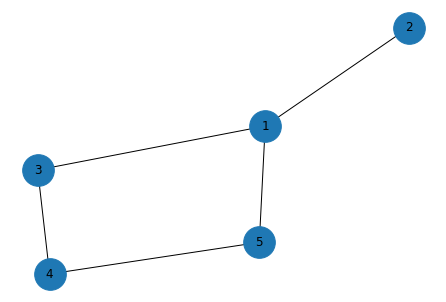

In [5]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G,pos,node_size=1000,with_labels=True)

# Топология сетей

Откроем сеть из файла. Файл представляет собой список связей сети. 

In [6]:
%cd ../../../

/Users/ArtemMac


In [7]:
%cd Desktop/

/Users/ArtemMac/Desktop


In [162]:
G=nx.read_edgelist('insta.txt', nodetype=int)

In [163]:
nx.write_multiline_adjlist(G,'insta1.txt')
G1=nx.read_multiline_adjlist('insta1.txt', create_using=nx.DiGraph())

Основные свойства:

1) число вершин

2) число связей 

3) плотность сети

In [165]:
t = []
for i in range(101):
    if str(i) not in set(G1.nodes()):
        t.append(str(i))

In [166]:
t.remove('0')

In [167]:
G1.add_nodes_from(t)

In [168]:
print("Number of nodes: %d" % nx.number_of_nodes(G1))
print("Number of edges: %d" % nx.number_of_edges(G1))
print("density: %s" % nx.density(G1))

Number of nodes: 100
Number of edges: 86
density: 0.008686868686868687


In [169]:
print(nx.info(G1))

Name: 
Type: DiGraph
Number of nodes: 100
Number of edges: 86
Average in degree:   0.8600
Average out degree:   0.8600


In [170]:
nx.is_directed(G1)

True

NetworkXError: Node 15 has no position.

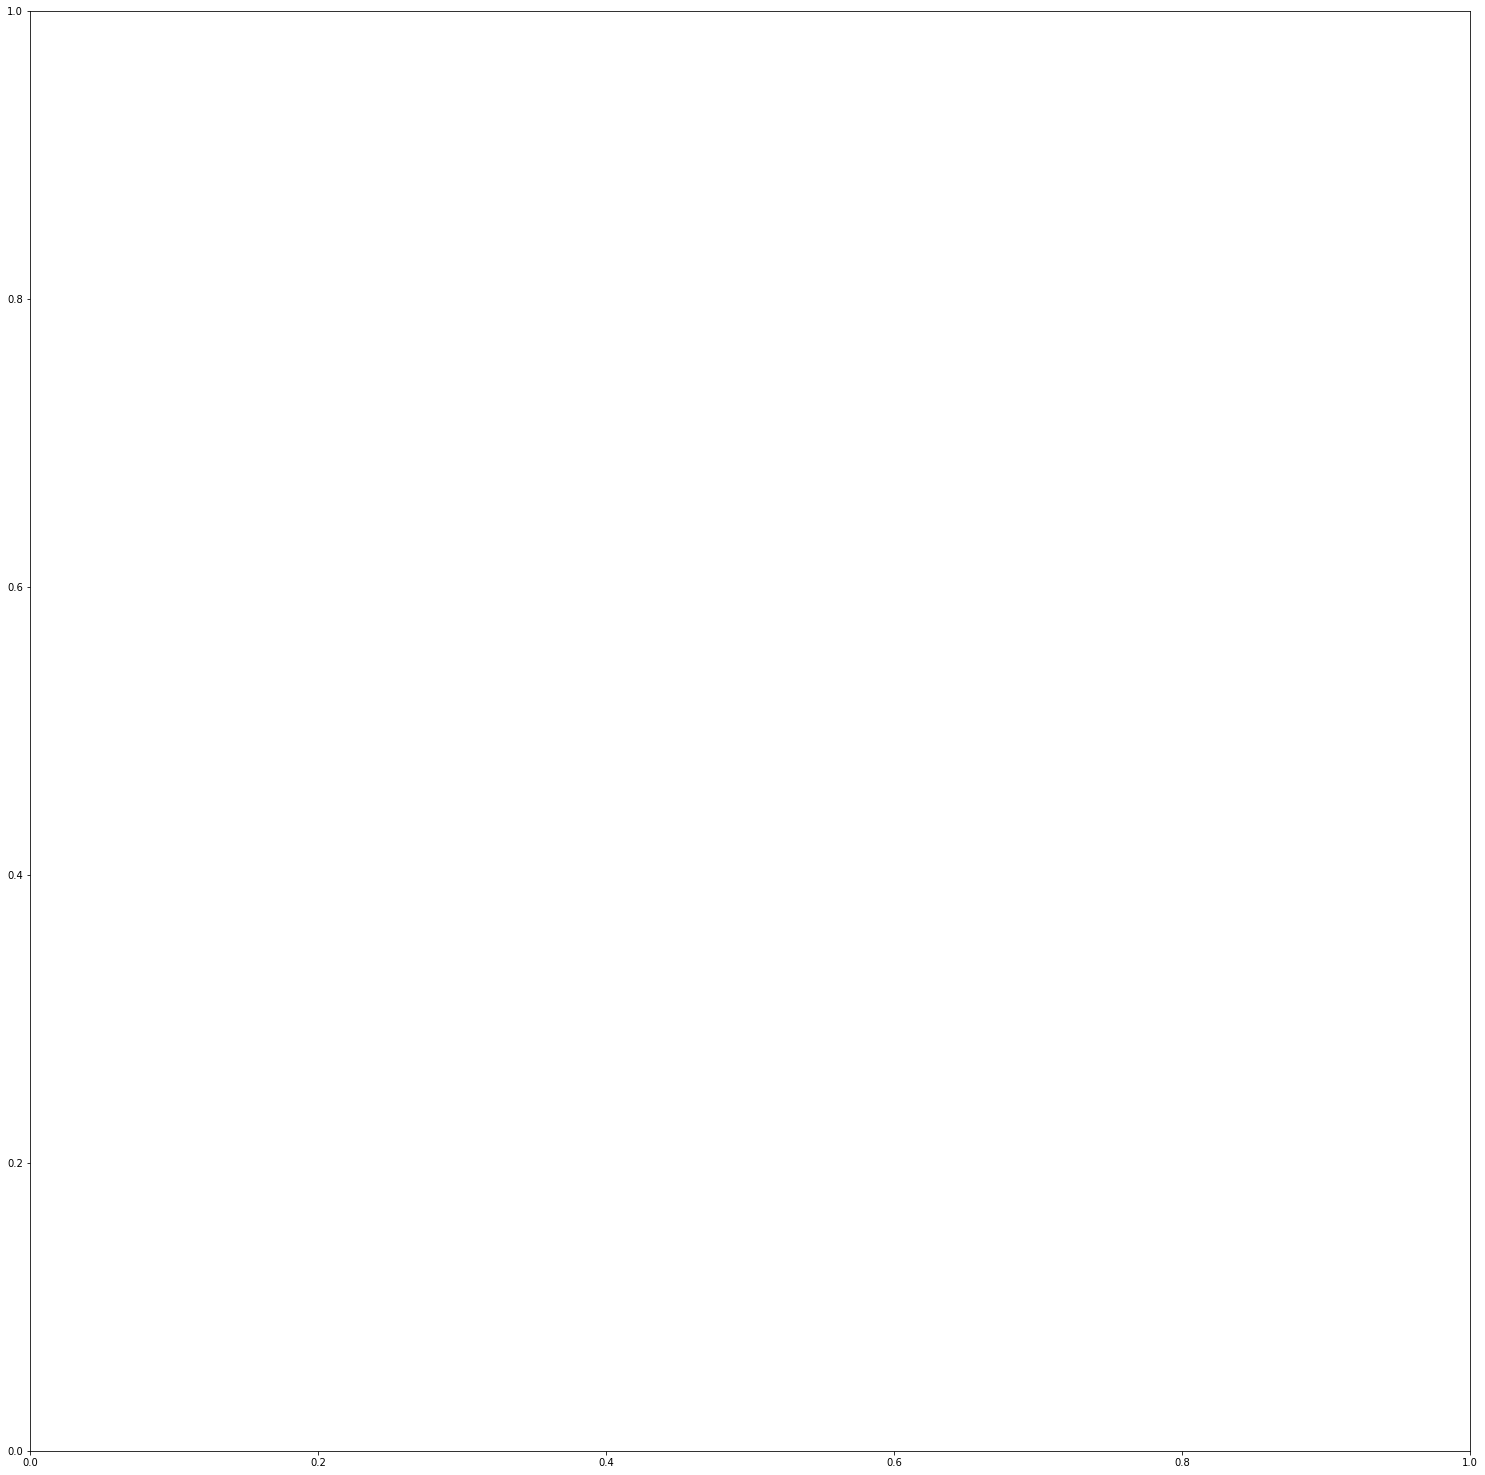

In [156]:
plt.figure(1,figsize=(20,20))
pos=nx.spring_layout(G1)
colors=range(nx.number_of_nodes(G1))
cmap=plt.cm.Blues
vmin = min(colors)
vmax = max(colors)
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=cmap,
           with_labels=True, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)
plt.show()

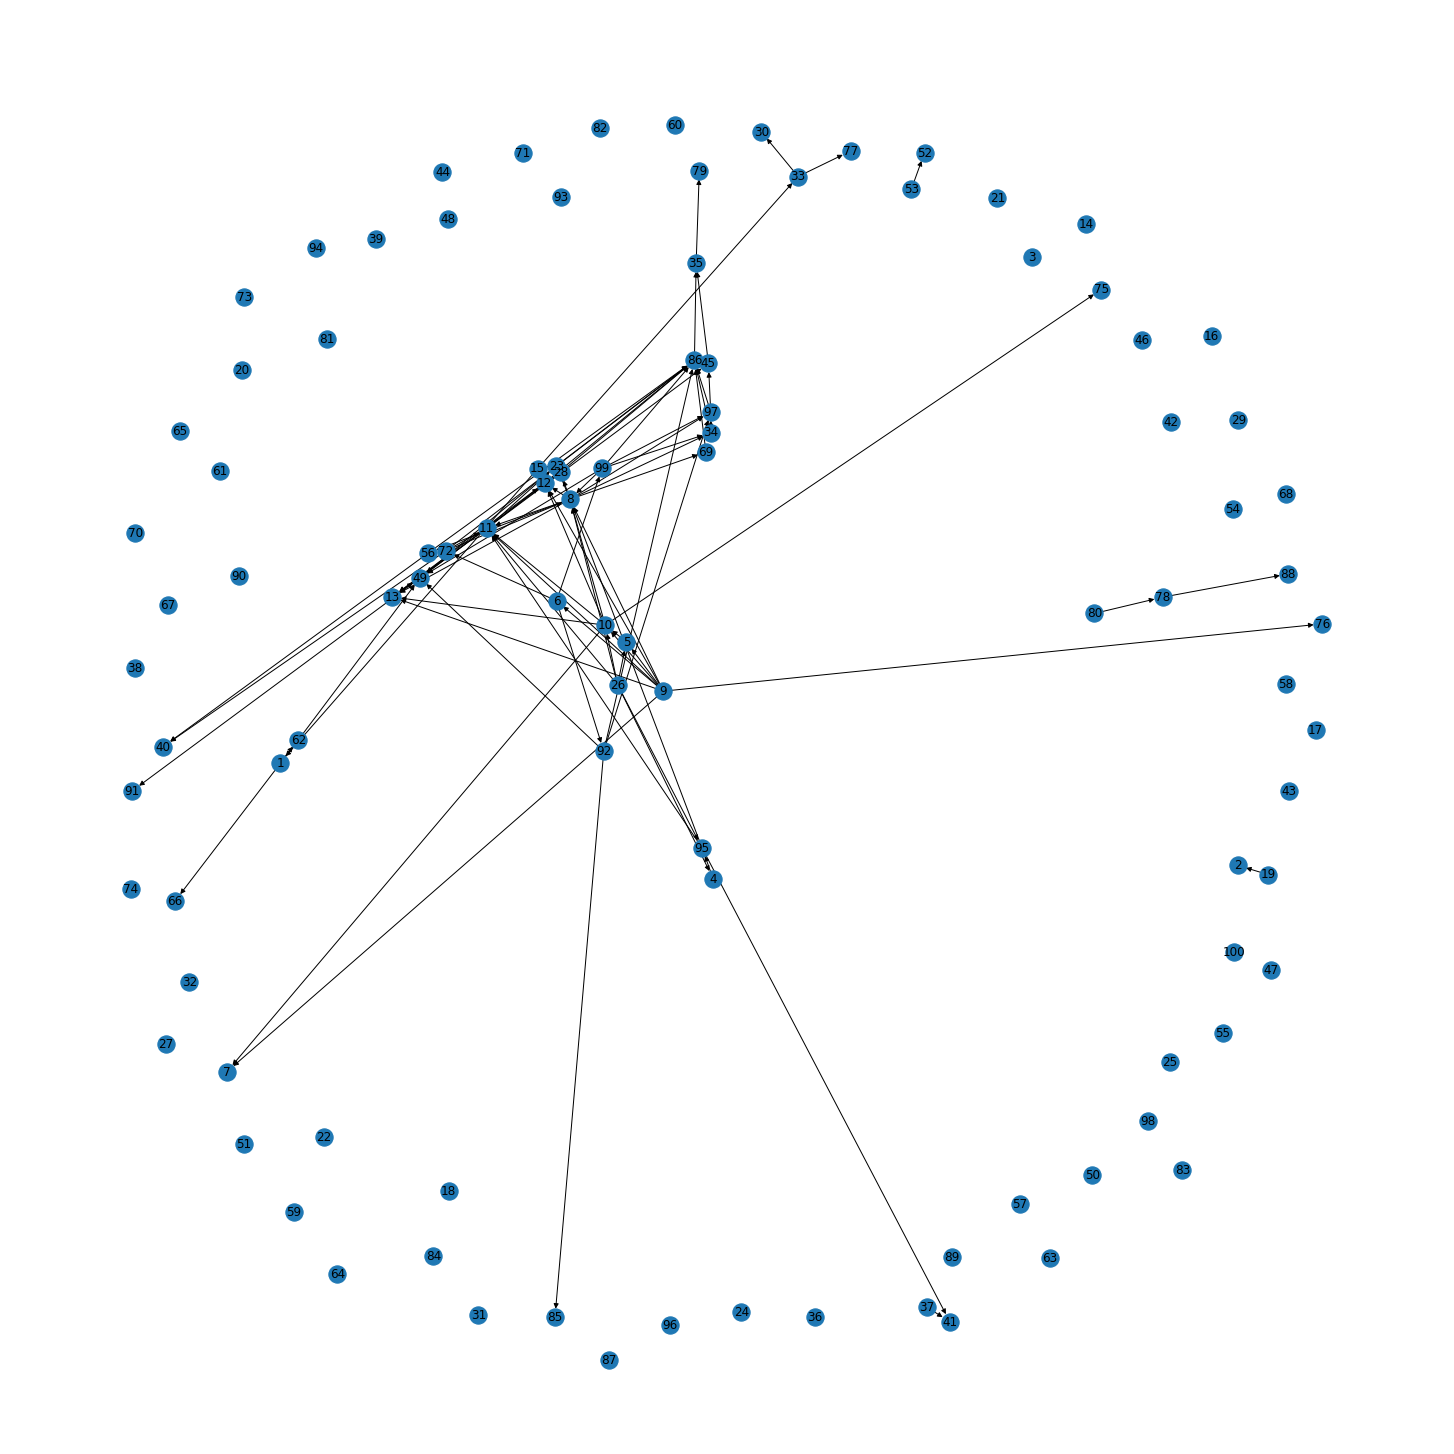

In [236]:
plt.figure(1,figsize=(20,20))
nx.draw(G1, with_labels=True,node_size=300)
plt.show()

In [179]:
G_comp = G1.copy()

In [180]:
G_comp.remove_nodes_from(t)
G_comp.remove_nodes_from(['2','19','80','78','88','52','53'])

In [224]:
print("Number of nodes: %d" % nx.number_of_nodes(G_comp))
print("Number of edges: %d" % nx.number_of_edges(G_comp))
print("density: %s" % nx.density(G_comp))

Number of nodes: 40
Number of edges: 82
density: 0.052564102564102565


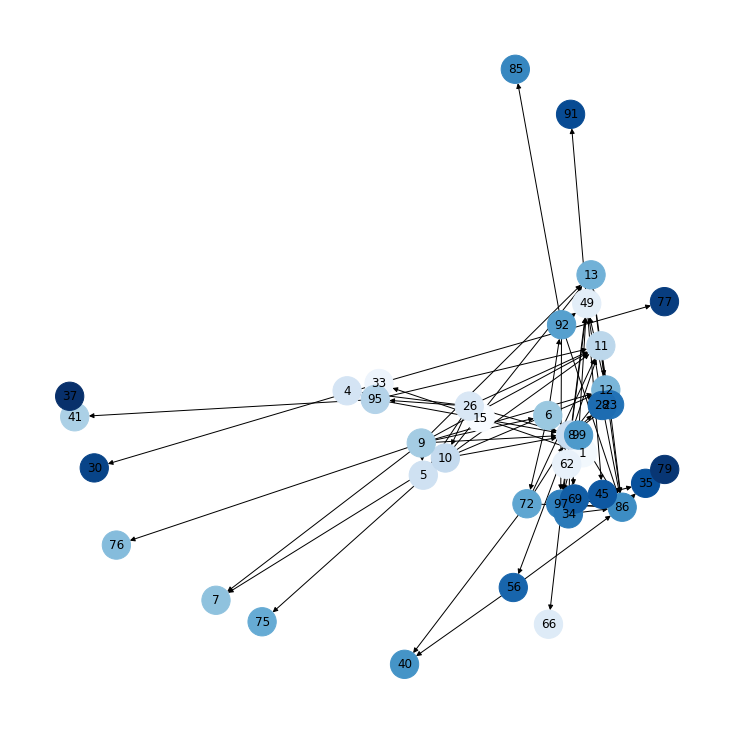

In [191]:
plt.figure(1,figsize=(10,10))
# nx.draw(G_comp, with_labels=True, node_size=700, node_color='oldlace')
pos = nx.spring_layout(G_comp, iterations=200)
nx.draw(G_comp, with_labels=True, node_color=range(40), node_size=800, cmap=plt.cm.Blues)
plt.show()

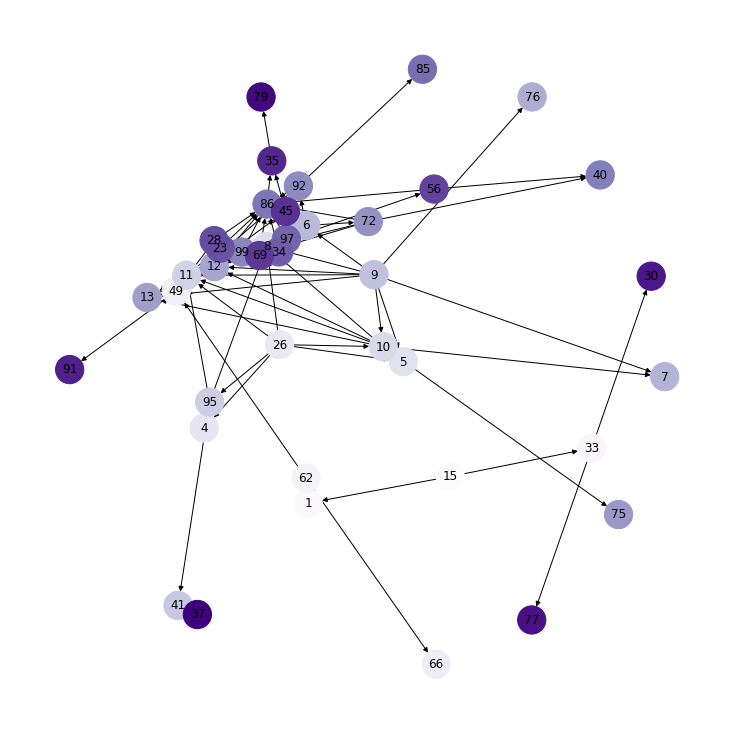

In [362]:
plt.figure(1,figsize=(10,10))
# nx.draw(G_comp, with_labels=True, node_size=700, node_color='oldlace')
pos = nx.spring_layout(G_comp, iterations=200)
nx.draw(G_comp, with_labels=True, node_color=range(40), node_size=800, cmap=plt.cm.Purples)
plt.show()

In [361]:
nx.eigenvector_centrality(G_comp, max_iter=1000).keys()

dict_keys(['15', '1', '33', '62', '49', '66', '26', '4', '5', '8', '10', '11', '95', '41', '9', '6', '7', '76', '12', '13', '75', '72', '92', '99', '40', '86', '85', '97', '34', '23', '28', '56', '69', '45', '35', '91', '30', '77', '79', '37'])

Более сложные характеристики:

In [225]:
# print("radius: %d" % nx.radius(G_comp))
# print("diameter: %d" % nx.diameter(G_comp))
print("Assortativity: %s" % nx.degree_assortativity_coefficient(G_comp))
print("Average shortest path: %s" % nx.average_shortest_path_length(G_comp))
print("Average clustering: %s" % nx.average_clustering(G_comp))
print("Transitivity: %s" % nx.transitivity(G_comp))
# print("Triangles: %s" % nx.triangles(G_comp))

Assortativity: -0.1163886966456942
Average shortest path: 0.4153846153846154
Average clustering: 0.10642406204906203
Transitivity: 0.14482758620689656


Некоторые характеристики удобнее представлять в виде распределения.

In [220]:
nx.degree(G_comp)

DiDegreeView({'15': 2, '1': 2, '33': 3, '62': 3, '49': 8, '66': 1, '26': 6, '4': 2, '5': 3, '8': 15, '10': 9, '11': 9, '95': 5, '41': 2, '9': 9, '6': 4, '7': 2, '76': 1, '12': 7, '13': 6, '75': 1, '72': 5, '92': 5, '99': 6, '40': 2, '86': 11, '85': 1, '97': 6, '34': 4, '23': 4, '28': 4, '56': 3, '69': 2, '45': 3, '35': 3, '91': 1, '30': 1, '77': 1, '79': 1, '37': 1})

In [222]:
G_comp.in_degree()

InDegreeView({'15': 0, '1': 1, '33': 1, '62': 1, '49': 6, '66': 1, '26': 0, '4': 1, '5': 2, '8': 6, '10': 3, '11': 6, '95': 2, '41': 2, '9': 0, '6': 1, '7': 2, '76': 1, '12': 4, '13': 5, '75': 1, '72': 1, '92': 1, '99': 1, '40': 2, '86': 10, '85': 1, '97': 4, '34': 2, '23': 2, '28': 2, '56': 1, '69': 1, '45': 2, '35': 2, '91': 1, '30': 1, '77': 1, '79': 1, '37': 0})

In [223]:
G_comp.out_degree()

OutDegreeView({'15': 2, '1': 1, '33': 2, '62': 2, '49': 2, '66': 0, '26': 6, '4': 1, '5': 1, '8': 9, '10': 6, '11': 3, '95': 3, '41': 0, '9': 9, '6': 3, '7': 0, '76': 0, '12': 3, '13': 1, '75': 0, '72': 4, '92': 4, '99': 5, '40': 0, '86': 1, '85': 0, '97': 2, '34': 2, '23': 2, '28': 2, '56': 2, '69': 1, '45': 1, '35': 1, '91': 0, '30': 0, '77': 0, '79': 0, '37': 1})

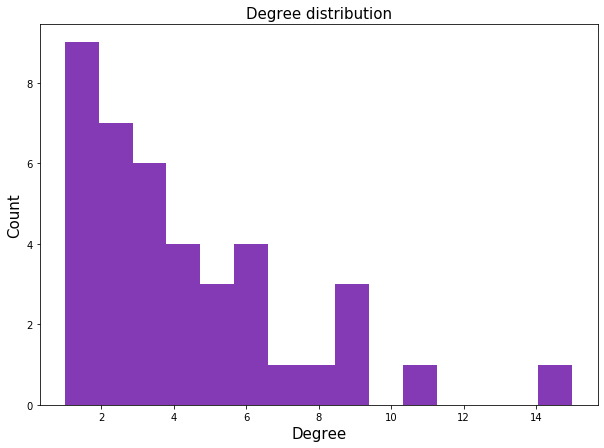

In [227]:
degree_sequence = sorted(dict(nx.degree(G_comp)).values(),reverse = True)
plt.figure(figsize = (10, 7))
plt.hist(degree_sequence, bins = 15, color='#833AB4')
plt.xlabel('Degree', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Degree distribution', size = 15)
plt.show()

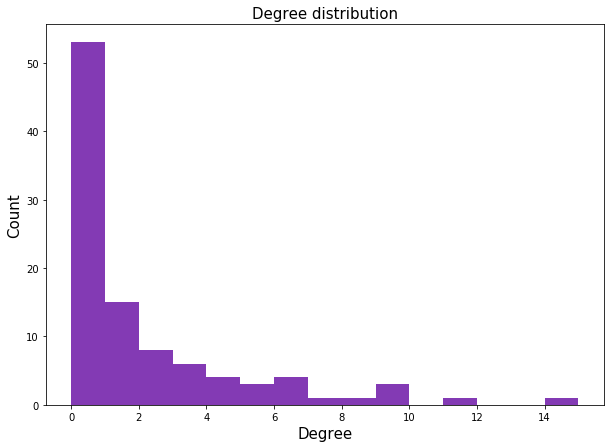

In [237]:
degree_sequence = sorted(dict(nx.degree(G1)).values(),reverse = True)
plt.figure(figsize = (10, 7))
plt.hist(degree_sequence, bins = 15, color='#833AB4')
plt.xlabel('Degree', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Degree distribution', size = 15)
plt.show()

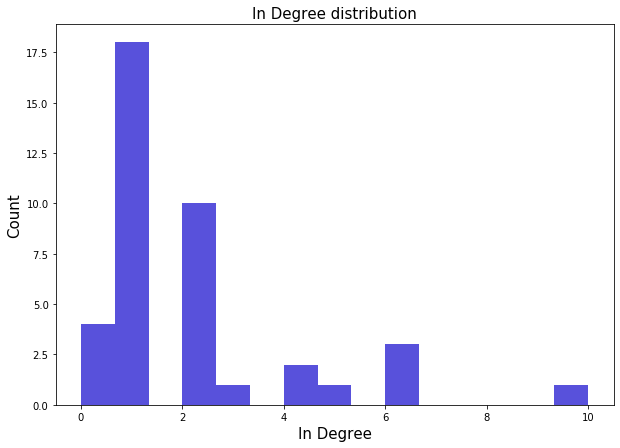

In [228]:
degree_sequence = sorted(dict(G_comp.in_degree()).values(),reverse = True)
plt.figure(figsize = (10, 7))
plt.hist(degree_sequence, bins = 15, color='#5851DB')
plt.xlabel('In Degree', size = 15)
plt.ylabel('Count', size = 15)
plt.title('In Degree distribution', size = 15)
plt.show()

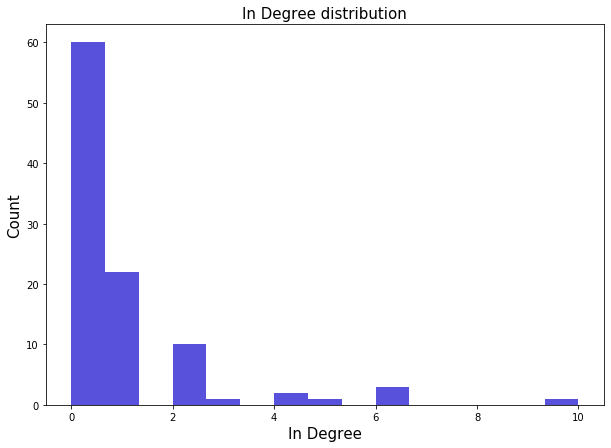

In [238]:
degree_sequence = sorted(dict(G1.in_degree()).values(),reverse = True)
plt.figure(figsize = (10, 7))
plt.hist(degree_sequence, bins = 15, color='#5851DB')
plt.xlabel('In Degree', size = 15)
plt.ylabel('Count', size = 15)
plt.title('In Degree distribution', size = 15)
plt.show()

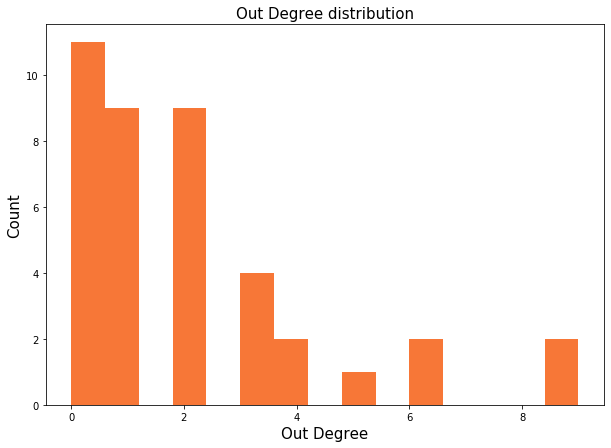

In [229]:
degree_sequence = sorted(dict(G_comp.out_degree()).values(),reverse = True)
plt.figure(figsize = (10, 7))
plt.hist(degree_sequence, bins = 15, color='#F77737')
plt.xlabel('Out Degree', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Out Degree distribution', size = 15)
plt.show()

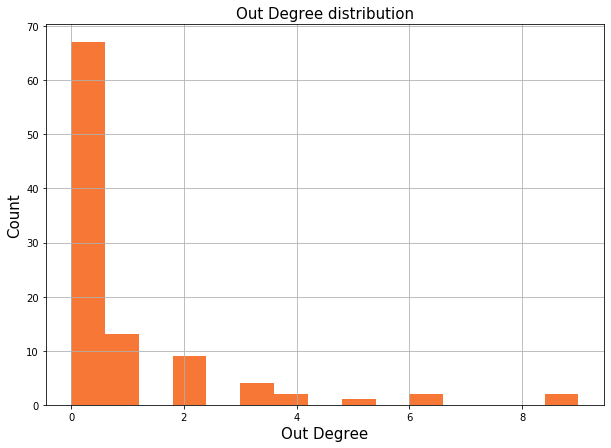

In [249]:
degree_sequence = sorted(dict(G1.out_degree()).values(),reverse = True)
plt.figure(figsize = (10, 7))
plt.hist(degree_sequence, bins = 15, color='#F77737')
plt.xlabel('Out Degree', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Out Degree distribution', size = 15)
plt.grid() ### Сетка
plt.show()

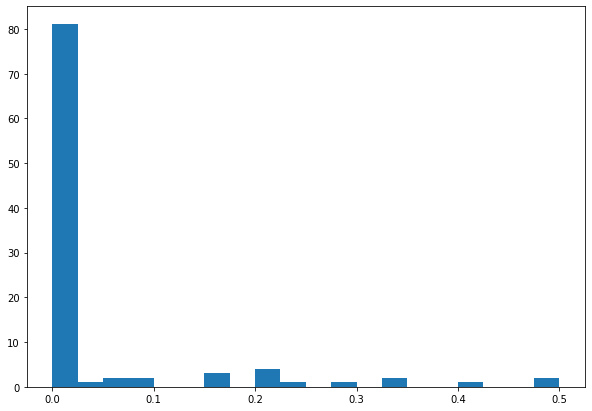

In [243]:
clustering_sequence=sorted(nx.clustering(G1).values(),reverse=True)
plt.figure(figsize=(10,7))
plt.hist(clustering_sequence, bins=20)
plt.show()

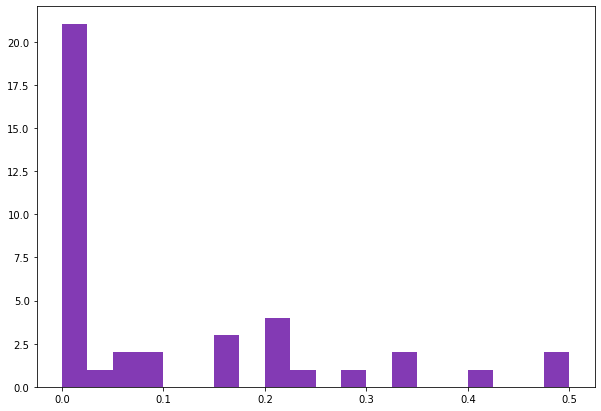

In [366]:
clustering_sequence=sorted(nx.clustering(G_comp).values(),reverse=True)
plt.figure(figsize=(10,7))
plt.hist(clustering_sequence, bins=20, color='#833AB4')
plt.show()

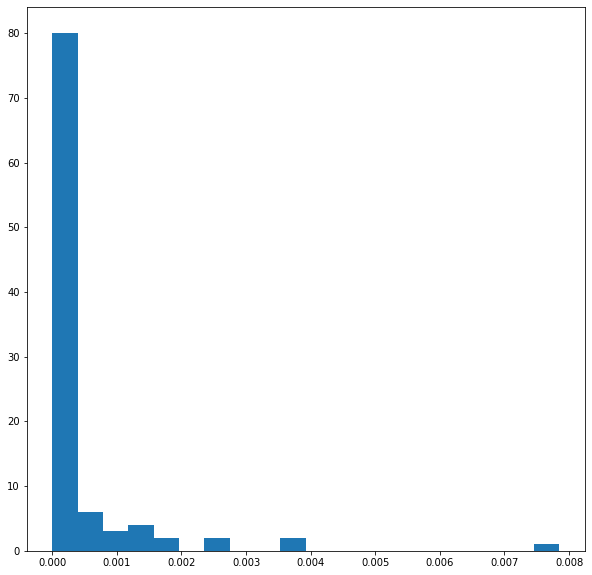

In [250]:
betweenness_centrality_sequence=sorted(nx.betweenness_centrality(G1).values(),reverse=True) 
plt.figure(figsize=(10,10))
plt.hist(betweenness_centrality_sequence, bins=20)
plt.show()

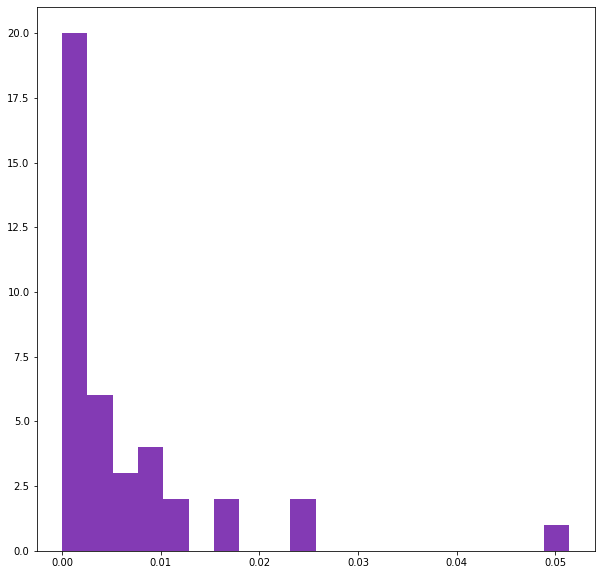

In [367]:
betweenness_centrality_sequence=sorted(nx.betweenness_centrality(G_comp).values(),reverse=True) 
plt.figure(figsize=(10,10))
plt.hist(betweenness_centrality_sequence, bins=20, color = '#833AB4')
plt.show()

In [270]:
Ensemble = 10 # число реализаций
# число вершин
BA_number_of_nodes = []
# число ребер
BA_number_of_edges = []
# плотность
BA_density = []
# радиус
BA_radius = []
# диаметр
BA_diameter = []
# ассортативность
BA_degree_assortativity_coefficient = []
# средний кратчайший путь
BA_average_shortest_path_length = []
# транзитивность
BA_transitivity = []
# средний коэффициент кластеризации
BA_average_clustering = []

In [271]:
for i in range(Ensemble):
    BA = nx.barabasi_albert_graph(nx.number_of_nodes(G_comp), 2)
    
    BA_number_of_nodes.append(nx.number_of_nodes(BA))
    
    BA_number_of_edges.append(nx.number_of_edges(BA))
    
    BA_density.append(nx.density(BA))
    
    BA_radius.append(nx.radius(BA))
    
    BA_diameter.append(nx.diameter(BA))
    
    BA_degree_assortativity_coefficient.append(nx.degree_assortativity_coefficient(BA))
    
    BA_average_shortest_path_length.append(nx.average_shortest_path_length(BA))
    
    BA_transitivity.append(nx.transitivity(BA))
    
    BA_average_clustering.append(nx.average_clustering(BA))

In [272]:
print("\nCлучайная сеть Барабаши-Альберта")
print("Number of nodes: %d" % np.mean(BA_number_of_nodes))
print("Number of edges: %d" % np.mean(BA_number_of_edges))
print("density: %s" % np.mean(BA_density))
print("radius: %d" % np.mean(BA_radius))
print("diameter: %d" % np.mean(BA_diameter))
print("Assortativity: %s" % np.mean(BA_degree_assortativity_coefficient))
print("Average shortest path: %s" % np.mean(BA_average_shortest_path_length))
print("Average clustering: %s" % np.mean(BA_average_clustering))
print("Transitivity: %s" % np.mean(BA_transitivity))


Cлучайная сеть Барабаши-Альберта
Number of nodes: 40
Number of edges: 76
density: 0.09743589743589744
radius: 3
diameter: 4
Assortativity: -0.26662008311529223
Average shortest path: 2.5410256410256413
Average clustering: 0.19975904773331243
Transitivity: 0.10928283593333261


In [276]:
print("\nCлучайная сеть Барабаши-Альберта")
print("Number of nodes: %d" % (nx.number_of_nodes(G_comp) - np.mean(BA_number_of_nodes)))
print("Number of edges: %d" % (nx.number_of_edges(G_comp) - np.mean(BA_number_of_edges)))
print("density: %s" % (nx.density(G_comp) - np.mean(BA_density)))
print("Assortativity: %s" % (nx.degree_assortativity_coefficient(G_comp) - np.mean(BA_degree_assortativity_coefficient)))
print("Average shortest path: %s" % (nx.average_shortest_path_length(G_comp) - np.mean(BA_average_shortest_path_length)))
print("Average clustering: %s" % (nx.average_clustering(G_comp) - np.mean(BA_average_clustering)))


Cлучайная сеть Барабаши-Альберта
Number of nodes: 0
Number of edges: 6
density: -0.04487179487179487
Assortativity: 0.15023138646959802
Average shortest path: -2.125641025641026
Average clustering: -0.0933349856842504


In [279]:
Ensemble = 10 # число реализаций
BA_degree_seq = []
for i in range(Ensemble):
    BA = nx.barabasi_albert_graph(nx.number_of_nodes(G_comp), 2)
    d2 = sorted(dict(nx.degree(BA)).values(),reverse = True)
    BA_degree_seq.extend(d2)
    
b2 = max(BA_degree_seq) - min(BA_degree_seq)

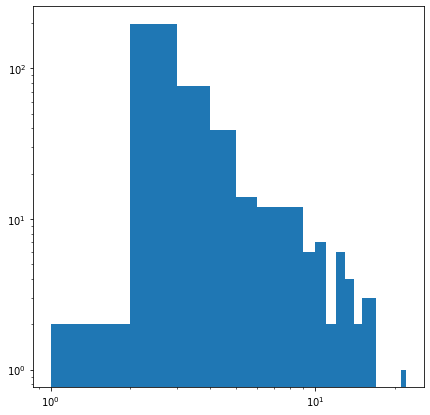

In [283]:
plt.figure(figsize=(7,7))
plt.hist(BA_degree_seq, bins = b2)
plt.yscale('log')
plt.xscale('log')
plt.show()

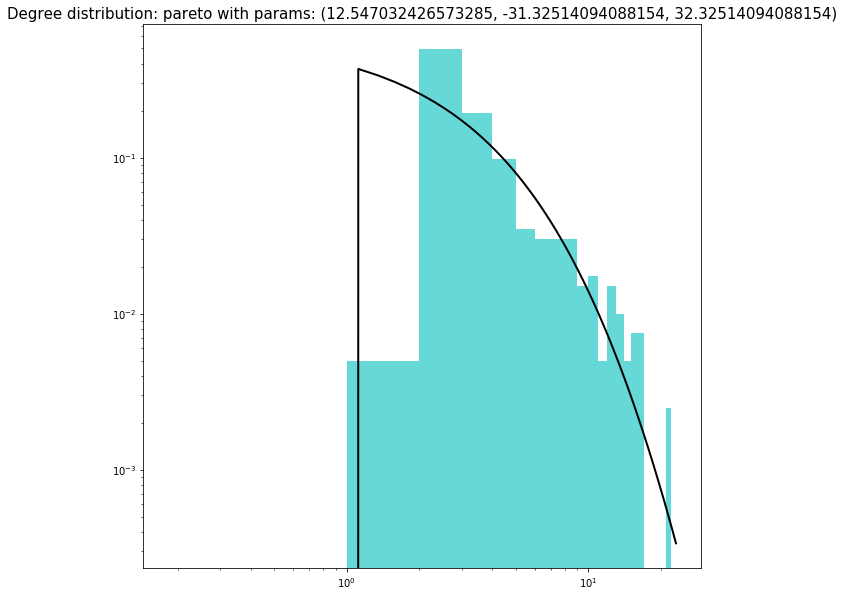

In [291]:
params = scipy.stats.pareto.fit(BA_degree_seq)
b = max(BA_degree_seq) - min(BA_degree_seq)
plt.figure(figsize=(10, 10))
plt.hist(BA_degree_seq, bins=b, normed=True, color='c', alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.pareto.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)
title = "Degree distribution: pareto with params: %s" % str(params) 
plt.title(title, size=15)
plt.xscale('log')
plt.yscale('log')
plt.show()

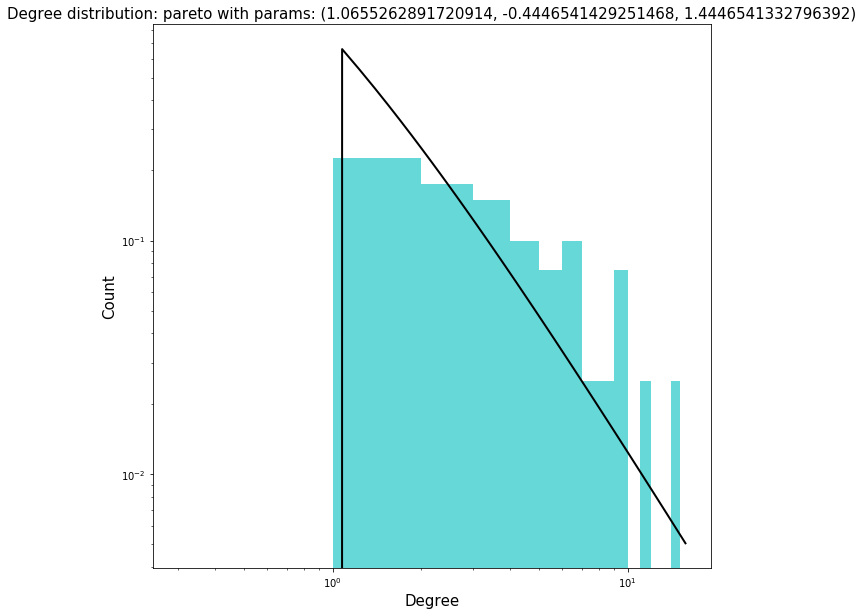

In [292]:
degree_sequence = sorted(dict(nx.degree(G_comp)).values(),reverse=True)
params_or = scipy.stats.pareto.fit(degree_sequence)
plt.figure(figsize=(10, 10))
plt.hist(degree_sequence, bins=max(degree_sequence) - min(degree_sequence), normed=True, color='c', alpha=0.6)
plt.xlabel('Degree', size=15)
plt.ylabel('Count', size=15)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.pareto.pdf(x, *params_or)
plt.plot(x, p, 'k', linewidth=2)
title = "Degree distribution: pareto with params: %s" % str(params_or) 
plt.title(title, size=15)
plt.xscale('log')
plt.yscale('log')
plt.show()

## Центральность

In [328]:
import pandas as pd

In [349]:
nx.eigenvector_centrality(G_comp, max_iter=1000)

{'15': 2.185752321197426e-22,
 '1': 1.1540772255922398e-19,
 '33': 1.1540772255922398e-19,
 '62': 3.041015346958768e-17,
 '49': 4.97523873372859e-06,
 '66': 5.331990659199568e-15,
 '26': 2.185752321197426e-22,
 '4': 1.1540772255922398e-19,
 '5': 2.3059686988632804e-19,
 '8': 2.6720657102338348e-14,
 '10': 6.093527751127038e-17,
 '11': 3.5312168451185877e-12,
 '95': 3.05253426169148e-17,
 '41': 5.362400594093925e-15,
 '9': 2.185752321197426e-22,
 '6': 1.1540772255922398e-19,
 '7': 1.0694275845570932e-14,
 '76': 1.1540772255922398e-19,
 '12': 3.7445108600186953e-10,
 '13': 3.315220748302971e-08,
 '75': 1.0694160656423606e-14,
 '72': 3.041015346958768e-17,
 '92': 3.041015346958768e-17,
 '99': 3.041015346958768e-17,
 '40': 3.681259063964613e-10,
 '86': 2.5542418716617195e-06,
 '85': 5.331990659199568e-15,
 '97': 3.723409054868611e-10,
 '34': 3.515160169116076e-12,
 '23': 3.7444039172624294e-10,
 '28': 3.2781266225206526e-08,
 '56': 3.509828178675451e-12,
 '69': 3.509828178675451e-12,
 '45'

In [340]:
df = pd.DataFrame({'node':list(nx.eigenvector_centrality(G_comp, max_iter=1000).keys())})
cent = nx.eigenvector_centrality(G_comp, max_iter=1000)
df['centrality_value'] = df['node'].apply(lambda x: cent[x])

In [346]:
df = df.sort_values('centrality_value', ascending=False)

In [347]:
df.head()

,node,centrality_value
38,79,0.999817
34,35,0.019124
33,45,0.000326
35,91,0.000326
4,49,0.000005


In [356]:
nx.katz_centrality(G_comp)

{'15': 0.12269587689150745,
 '1': 0.1349654645806582,
 '33': 0.1349654645806582,
 '62': 0.13619242334957327,
 '49': 0.2174824907541344,
 '66': 0.13631511922646478,
 '26': 0.12269587689150745,
 '4': 0.1349654645806582,
 '5': 0.14723505226980893,
 '8': 0.205515593793275,
 '10': 0.16195855749678983,
 '11': 0.21244791083764514,
 '95': 0.148462011038724,
 '41': 0.1498116656845306,
 '9': 0.12269587689150745,
 '6': 0.1349654645806582,
 '7': 0.15116132033033716,
 '76': 0.1349654645806582,
 '12': 0.19295767079342918,
 '13': 0.21225343787277212,
 '75': 0.13889173264118646,
 '72': 0.13619242334957327,
 '92': 0.13619242334957327,
 '99': 0.13619242334957327,
 '40': 0.15063986285354825,
 '86': 0.27850632804107917,
 '85': 0.13631511922646478,
 '97': 0.1861725888013288,
 '34': 0.15686667860579226,
 '23': 0.16449222735459948,
 '28': 0.16254320335017786,
 '56': 0.14324743627083494,
 '69': 0.14324743627083494,
 '45': 0.16306137257746606,
 '35': 0.16685258928629984,
 '91': 0.1444441136973332,
 '30': 0.136

In [357]:
df = pd.DataFrame({'node':list(nx.katz_centrality(G_comp).keys())})
cent = nx.katz_centrality(G_comp)
df['centrality_value'] = df['node'].apply(lambda x: cent[x])

In [358]:
df = df.sort_values('centrality_value', ascending=False)
df.head()

,node,centrality_value
25,86,0.278506
4,49,0.217482
11,11,0.212448
19,13,0.212253
9,8,0.205516
